# Gym Members Dataset Analysis

#### Presented by: Jules Perna and Yany Martinez

**Motivation**

We chose this dataset because it provides insight to the relationship between exercise habits and how it can benefit your overall health. By analyzing factors like workout duration, calories burned, workout type, we can quantify how these different exercise methods provide a positive outcome. 

For our analysis we chose to investigate a gym members exercise dataset. This dataset provides a detailed overview of gym members exercicse routines, physical attributes, and fitness metrics. It contains 973 samples of gym data, including key performance indicators such as heart rate, calories burned, and workout duration. For our analysis specifically, we will be looking at the relationship between duration of a specific exercise and the amount of calories burned, comparing the weights of females and males, and analyzing the correlation between calories burned and weight.

**Note: This dataset was generated using simulated data based on realistic gym exercise patterns**

The libraries we will be using for our analysis is pandas for filtering our data, matplotlib for plotting, numpy for any calculations, and ipywidgets for... widgets.

In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive, interact

In [22]:
# Import Data
gymData = pd.read_csv('gym_members_exercise_tracking.csv', delimiter = ',')
gymData

,Age,Gender,Weight(kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883,HIIT,28.2,2.1,3,2,37.74


For the purpose of our analysis, we will only be looking at the categories: Gender, Weight(kg), Session_Duration(hours), Calories_Burned, Workout_Type, and Age. We will be using the pandas library to help us with filtering our data because we are looking at columns with words that carry no numerical value.

## Hypothesis 1

Since we know this data is simulated, we wanted to test its accuracy by visualizing the weights of males vs females. We know that males on average weigh more than females and wanted to confirm the dataset would reflect this properly.

In [4]:
#Extracting weights of males and dropping any unknown values
male  = gymData[gymData['Gender'] == 'Male']['Weight(kg)'].dropna()

#Extracting weights of females and dropping and unknown values
female = gymData[gymData['Gender'] == 'Female']['Weight(kg)'].dropna()

#Extracting weights of everyone and dropping unknown values
weight = gymData['Weight(kg)'].dropna()

#Assigning the width for the histogram bins
width = 3

#Creating bins from 0 - 140 pounds, in increments of 3
bins = np.arange(0,140, width)

(0.0, 200.0)

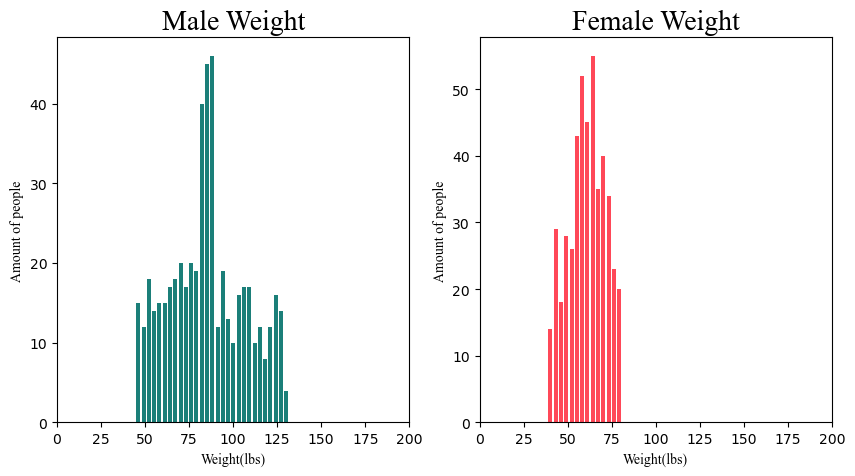

In [17]:
#Creating an empty plot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# Male histogram
axes[0].hist(male, bins=bins, width=0.75*width, color=(27/255, 127/255, 121/255))
axes[0].set_title('Male Weight', fontname='Times New Roman', fontsize=20)
axes[0].set_xlabel('Weight(lbs)', fontname='Times New Roman')
axes[0].set_ylabel('Amount of people', fontname='Times New Roman')
axes[0].set_xlim(0, 200)

# Female histogram
axes[1].hist(female, bins=bins, width=0.75*width,  color=(255/255, 72/255, 88/255))
axes[1].set_title('Female Weight', fontname='Times New Roman', fontsize=20)
axes[1].set_xlabel('Weight(lbs)', fontname='Times New Roman')
axes[1].set_ylabel('Amount of people', fontname='Times New Roman')
axes[1].set_xlim(0, 200)

# Analysis

To ensure accuracy, lets look at the max and minimum values of the graphs to make sure they make sense with the visualization.

In [23]:
print(f'The maximum weight for males is {male.max()}.\n')
print(f'The minimum weight for males is {male.min()}.\n')
print(f'The maximum weight for females is {female.max()}.\n')
print(f'The minimum weight for females is {female.min()}.\n')
print('This is represented in our visualization.\n')

The maximum weight for males is 129.9.

The minimum weight for males is 45.0.

The maximum weight for females is 79.9.

The minimum weight for females is 40.0.

This is represented in our visualization.



These statistics indicate that males generally weigh more than females in this dataset

# Conclusion

The data supports our hypothesis confirming that the simulated dataset correctly follows real-world expectantions in terms of weight distribution by gender.

# Hypothesis 2

For our next analysis we're going to be filtering our data by the 4 different workout types in this dataset: Yoga, Strength, HIIT (High Intensity Interval Training), and Cardio. We'll specifically be looking at the comparison between the session duration and calories burned. We predict that HIIT will have the highest amount of calories burned because of the intensity of the workouts. 

In [8]:
#Assigning variables to each category
dur = 'Session_Duration (hours)'
cal = 'Calories_Burned'
wType = 'Workout_Type'

In [9]:
#Filtering the data by workout type yoga and setting duration and calories to ascending so it plots properly
yogaFilter = gymData[gymData[wType] == 'Yoga'].sort_values(by=[dur, cal], ascending=[True, True])
yogaDur = yogaFilter[dur]
yogaCal = yogaFilter[cal]

In [10]:
#Filtering the data by workout type strength
strengthFilter = gymData[gymData[wType] == 'Strength'].sort_values(by =[dur, cal], ascending=[True, True])
strengthDur = strengthFilter[dur]
strengthCal = strengthFilter[cal]

In [11]:
#Filtering the data by workout type hiit
hiitFilter = gymData[gymData[wType] == 'HIIT'].sort_values(by=[dur, cal], ascending = [True, True])
hiitDur = hiitFilter[dur]
hiitCal = hiitFilter[cal]

In [12]:
#Filtering the data by workout type cardio
cardioFilter = gymData[gymData[wType] == 'Cardio'].sort_values(by=[dur, cal], ascending = [True, True])
cardioDur = cardioFilter[dur]
cardioCal = cardioFilter[cal]

In [19]:
#Creating an empty 2x2 plot
def plot1(option):
    
    fig, ax = plt.subplots(figsize = (10,6))
    ax.set_xlim(0.5, 2.01)
    ax.set_ylim(300, 1800)

    ax.set_xlabel('Time (Hrs)', fontname = 'Times New Roman', fontsize = 18)
    ax.set_ylabel('Calories Burned', fontname = 'Times New Roman', fontsize = 18)

    ax.grid()
    #Creating main title
    #fig.suptitle('Calories Burned Over Time by Workout Type', fontsize = 36, fontname = 'Times New Roman')
        #Plotting each workout type by duration and calories and setting xlim and ylim
    if 'Yoga' in option:
        ax.scatter(yogaDur, yogaCal, color = (69/255, 196/255, 176/255))
        ax.set_title('Yoga', fontname = 'Times New Roman', fontsize = 22)
    elif 'Strength' in option:
        ax.scatter(strengthDur, strengthCal, color = (19/255, 103/255, 138/225))
        ax.set_title('Strength', fontname = 'Times New Roman', fontsize = 22)
    elif 'HIIT' in option:
        ax.scatter(hiitDur, hiitCal, color = (154/255, 235/255, 163/255))
        ax.set_title('HIIT', fontname = 'Times New Roman', fontsize = 22)
    elif 'Cardio' in option:
        ax.scatter(cardioDur, cardioCal, color = (1/255, 32/255, 48/255))
        ax.set_title('Cardio', fontname = 'Times New Roman', fontsize = 22)

In [18]:
sliderStyle = {'description_width': '200px'}
sliderLayout = widgets.Layout(width='600px')
workoutType = widgets.Select(options = ['HIIT', 'Strength', 'Cardio', 'Yoga'], value = 'HIIT', description = 'Select Multiple', layout = sliderLayout, style=sliderStyle)
interactivePlot = interactive(plot1, option = workoutType)
display(interactivePlot)

interactive(children=(Select(description='Select Multiple', layout=Layout(width='600px'), options=('HIIT', 'St…

# Analysis

In [14]:
print(f'The max amount of calories burned for yoga is {yogaCal.max()} calories after {round(yogaDur.max(), 1)} hours.\n')
print(f'The max amount of calories burned for strength training is {strengthCal.max()} calories after {round(strengthDur.max(), 1)} hours.\n')
print(f'The max amount of calories burned for HIIT is {hiitCal.max()} calories after {round(hiitDur.max(), 1)} hours.\n')
print(f'The max amount of calories burned for Cardio is {cardioCal.max()} calories after {round(cardioDur.max(), 1)} hours.\n')

The max amount of calories burned for yoga is 1582 calories after 2.0 hours.

The max amount of calories burned for strength training is 1783 calories after 2.0 hours.

The max amount of calories burned for HIIT is 1766 calories after 2.0 hours.

The max amount of calories burned for Cardio is 1625 calories after 2.0 hours.



From these numbers we can see strength training actually has the highest amount of calories burned (not by much). Let's calculate the averages to see if the outcome is consistent with the max value and average.

In [15]:
print(f'The average amount of calories burned for yoga is {round(yogaCal.mean(), 2)} calories.\n')
print(f'The average amount of calories burned for strength training is {round(strengthCal.mean(), 2)} calories.\n')
print(f'The average amount of calories burned for HIIT is {round(hiitCal.mean(), 2)} calories.\n')
print(f'The average amount of calories burned for cardio is {round(cardioCal.mean(), 2)} calories.\n')

The average amount of calories burned for yoga is 903.19 calories.

The average amount of calories burned for strength training is 910.7 calories.

The average amount of calories burned for HIIT is 925.81 calories.

The average amount of calories burned for cardio is 884.51 calories.



# Conclusion

According to these numbers, strength training on average does not seem to be the workout type that burns the most calories. Again, while the difference is not significant, there is still a difference. Surprisingly, cardio seemed to be the workout type that on average burnt the least calories which you wouldn't think would be the case. I believe this is because nobody wants to run on a treadmill for 2 hours. These average calculations prove our hypothesis correct, that HIIT burns the most calories.

# Hypothesis 3

For our last graph, we will be analyzing the correlation between calories burned and weight. We predict the more you weigh, the more calories you burn when exercising. 

# Analysis

In [21]:
# Assigning variables to the data
calBurn = gymData['Calories_Burned'].dropna()

# Sorting data by weight
sortData = gymData[['Weight(kg)', 'Calories_Burned', 'Session_Duration (hours)']].dropna().sort_values(by='Weight(kg)')

# Extract sorted values
sortWeight = sortData['Weight(kg)']
sortCalBurn = sortData['Calories_Burned']
sortDuration = sortData['Session_Duration (hours)']

Text(0.5, 1.0, 'Weight vs. Calories Burned')

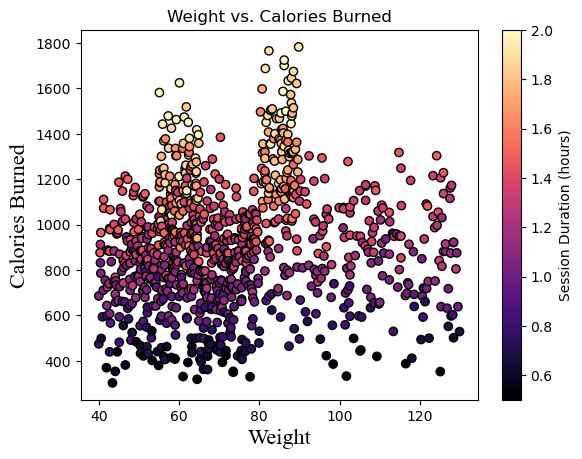

In [20]:
# Create a scatter plot
fig, axes = plt.subplots()
#axes.scatter(sortWeight, sortCalBurn, color=(0/255, 204/255, 192/255), edgecolor='black')
myPlot = axes.scatter(sortWeight, sortCalBurn, c=sortDuration, cmap='magma', edgecolor='black')
cbar = fig.colorbar(myPlot, ax=axes, label = 'Session Duration (hours)')

# Labels
axes.set_xlabel('Weight', fontname='Times New Roman', fontsize = 16)
axes.set_ylabel('Calories Burned', fontname='Times New Roman', fontsize = 16)
axes.set_title('Weight vs. Calories Burned')

# Conclusion

This scatter plot doesn't show a linear relationship between weight and calories burned. We can see a cluster around 70kgs and 893 calories burned because based on our previous histogram, we saw that there aren't any females that weigh more than 79.9 pounds. This means the biggest representation of males and females is between 50-70kg. There is a lighter cluster at the end because it is only representing the weight of males. The colors of the graph represent the duration of each workout session. From the graph, we can see that the longer you spend exercising, the more calories you burn. This disproves our hypothesis by showing us there isn't necessarily a connection between your weight and calories burned, but moreso a connection between session duration and calories burned. 